# TOP WORDS

In [1]:
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize

In [30]:
df = pd.read_csv('sentimen_ruu_pks.csv')
clean_tweets = df['clean_tweets']

In [31]:
print(clean_tweets.head())

0    gue mah fokus simpul tolak dukung ruu pks kalo...
1    anggota baleg fpks urgensi terus ruu hip https...
2    elpanjullo rahayusaraswati nongandah tsamaradk...
3    dikaagustianna bemunila dr smua jd tau org mac...
4          ruu pks solusi pks solusi httpstcoyacalwstc
Name: clean_tweets, dtype: object


In [32]:
data = [word_tokenize(paragraf) for paragraf in clean_tweets]

In [33]:
import itertools
#menyatukan semua list
data = list(itertools.chain(*data))

In [34]:
myStopwords = ['ruu','pks','sahkan','emg','si', 'udh','eh','kalo','sih','nolak','aja','kemana','gw','ga','gak','yg','emang','ya','aye','smua', 'tau', 'org','🤣', 'n','😞','gue', 'mah','sy','km']

#with open("myStopwords.txt", "w") as output:
#    output.write(str(values))

In [35]:
#pos_list = open("myStopwords.txt","r")
#pos_kata = pos_list.readlines()

data = [word for word in data if word not in myStopwords]
print(data)

['fokus', 'simpul', 'tolak', 'dukung', 'tolak', 'okay', 'skip', 'tulis', 'ranah', 'biar', 'expert', 'nilai', 'httpstcofnxooblq', 'anggota', 'baleg', 'fpks', 'urgensi', 'terus', 'hip', 'httpstcolsdwxxvapr', 'fpksdprri', 'pakmul', 'semangatbarupks', 'pkspelayanrakyat', 'bersamamelayanirakyat', 'elpanjullo', 'rahayusaraswati', 'nongandah', 'tsamaradki', 'daranasution', 'kokokdirgantoro', 'tolak', 'takut', 'hrs', 'jerat', 'pakai', 'pasal', 'sah', 'dikaagustianna', 'bemunila', 'dr', 'jd', 'macem', 'tolak', 'pintar', 'bs', 'percaya', 'mrk', 'solusi', 'solusi', 'httpstcoyacalwstc', 'rahayu', 'saraswati', 'isu', 'perempuan', 'cakep', 'bats', 'dah', 'nyata', 'mpok', 'rahayusaraswati', 'dukung', 'kesah', 'sahkanruupks', 'nongandah', 'tsamaradki', 'daranasution', 'kokokdirgantoro', 'httpstcobcwoibbi', 'moga', 'sah', 'edbertyazawa', 'petanihalu', 'halo', 'kak', 'sah', 'mari', 'bersamasama', 'desak', 'ketua', 'dpr', 'ri', 'puan', 'maharani', 'masuk', 'daftar', 'prolegnas', 'prioritas', 'amp', 'sah'

In [36]:
from nltk.probability import FreqDist
#menghitung berapa data yang dipunya
fqdist = FreqDist(data)
print(fqdist)

<FreqDist with 3528 samples and 11106 outcomes>


In [37]:
#most top ten 
topten = fqdist.most_common(10)
top = pd.DataFrame(topten)
top

,0,1
0,tolak,185
1,tubirfess,143
2,bem,124
3,keras,116
4,seksual,109
5,dukung,107
6,perempuan,103
7,dpr,103
8,sah,101
9,bahas,87


Viusualization 

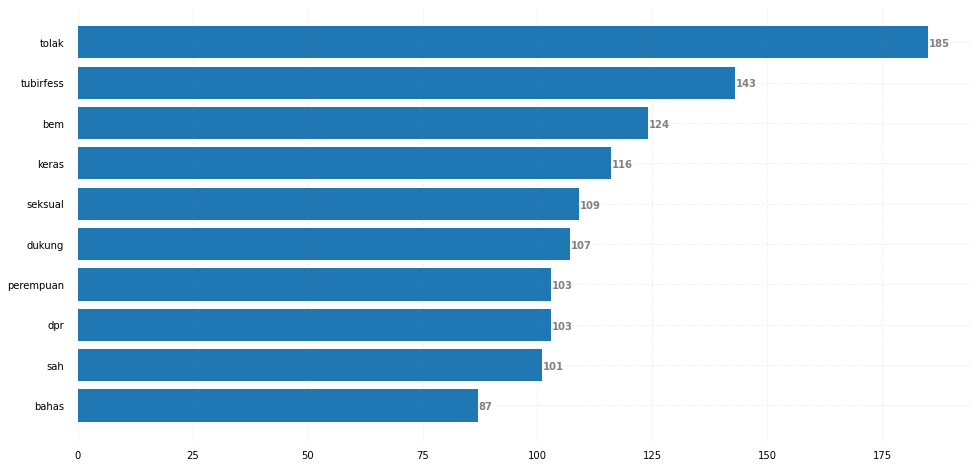

In [38]:
import pandas as pd 
from matplotlib import pyplot as plt 
  
name = top[0].head(20) 
price = top[1].head(20) 
  
# Figure Size 
fig, ax = plt.subplots(figsize =(16, 8)) 
  
# Horizontal Bar Plot 
ax.barh(name, price) 
  
# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
  
#Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
  
# Show top values  
ax.invert_yaxis() 
  
# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='grey') 
  
# Add Plot Title 
#ax.set_title('Sports car and their price in crore', 
            # loc ='left', ) 
  
# Add Text watermark 
fig.text(0.9, 0.15,'',fontsize = 12, 
         color ='grey', ha ='right', va ='bottom', 
         alpha = 0.7) 
  
# Show Plot 
plt.show() 

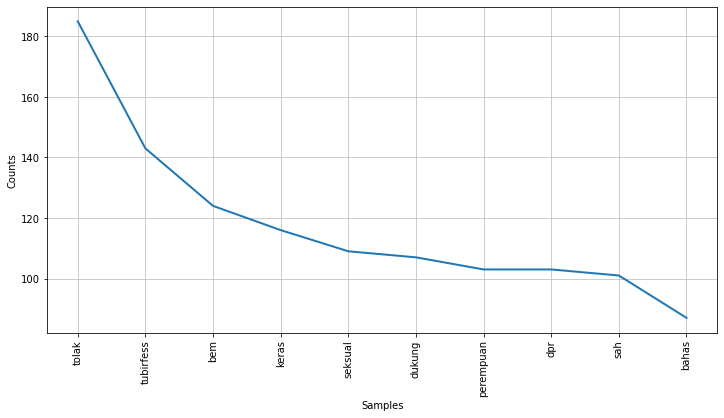

In [39]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.figure(figsize=(12, 6))
fqdist.plot(10,cumulative=False)
plt.show()

WORDCLOUD

In [12]:
data_1 = ' '.join(data)
data_1 = data_1.upper()

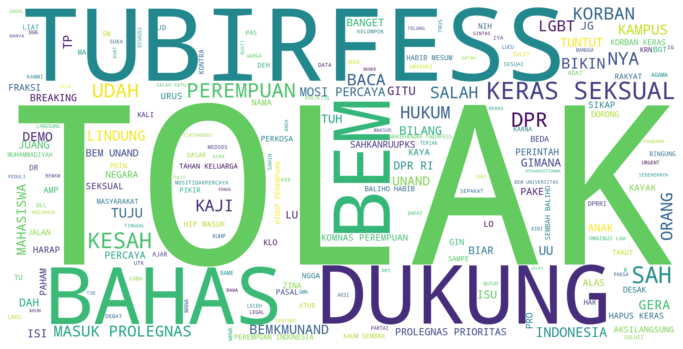

In [15]:
from wordcloud import WordCloud


wordcloud = WordCloud(background_color="white", width=1600, height=800, random_state=1000,max_font_size=600).generate(data_1)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud.to_file("result/wordcloud_ruu_pks_1.png")

POLARITY

In [16]:
import numpy as np

In [17]:
pos_list = open("kata_positif.txt","r")
pos_kata = pos_list.readlines()
neg_list = open("kata_negatif.txt","r")
neg_kata = neg_list.readlines()

sentimen = []
hasil = []

for item in clean_tweets:
    count_p = 0
    count_n = 0
    for kata_pos in pos_kata:
        if kata_pos.strip() in item:
            count_p += 1
    for kata_neg in neg_kata:
        if kata_neg.strip() in item:
            count_n += 1
            
    #positif.append(int(count_p))
    #negatif.append(int(count_n))
    hasil.append(count_p - count_n)
    
    i = (count_p - count_n)
    
    if i == 0:
        sentimen.append('Netral') 
    elif i > 0:
        sentimen.append('Positif')
    else:
        sentimen.append('Negatif')

df = pd.DataFrame(columns=['clean_tweets'])
df['clean_tweets'] = clean_tweets
df['count'] = hasil
df['sentimen'] = sentimen

df.head()
df.to_csv('sentimen_ruu_pks.csv')

In [18]:
print("Nilai rata-rata: "+str(np.mean(hasil)))
print("Standar deviasi: "+str(np.std(hasil)))

Nilai rata-rata: -0.42701525054466233
Standar deviasi: 1.625173033115854


In [19]:
import matplotlib.pyplot as plt 

#visualisasikan dengan plot 
#labels, counts = np.unique(hasil, return_counts=True)
#plt.bar(labels, counts, align='center')
#plt.gca().set_xticks(labels)
#plt.show()

POLARITY

In [40]:
import pandas as pd
df = pd.read_csv('sentimen_ruu_pks.csv')
sentiment = df['sentimen']

In [42]:
sentiment.head()

0     Netral
1    Positif
2    Negatif
3    Positif
4    Positif
Name: sentimen, dtype: object

In [43]:
from nltk.probability import FreqDist
#menghitung berapa data yang dipunya
fqdist = FreqDist(sentiment)
print(fqdist)

<FreqDist with 3 samples and 918 outcomes>


In [44]:
#most top ten 
topten = fqdist.most_common(3)
top = pd.DataFrame(topten)
top

,0,1
0,Negatif,383
1,Netral,310
2,Positif,225


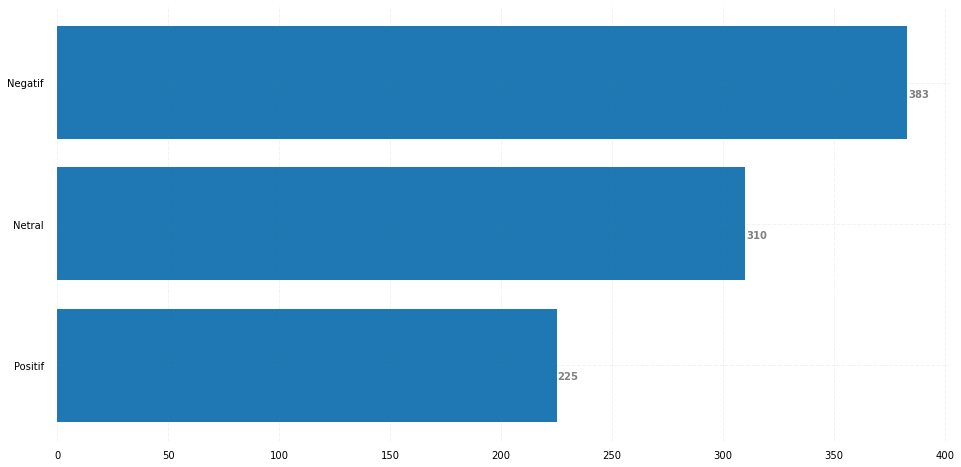

In [47]:
import pandas as pd 
from matplotlib import pyplot as plt 
  
name = top[0].head(3) 
price = top[1].head(3) 
  
# Figure Size 
fig, ax = plt.subplots(figsize =(16, 8)) 
  
# Horizontal Bar Plot 
ax.barh(name, price) 
  
# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
  
#Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
  
# Show top values  
ax.invert_yaxis() 
  
# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='grey') 
  
# Add Plot Title 
#ax.set_title('Sports car and their price in crore', 
            # loc ='left', ) 
  
# Add Text watermark 
fig.text(0.9, 0.15,'',fontsize = 12, 
         color ='grey', ha ='right', va ='bottom', 
         alpha = 0.7) 
  
# Show Plot 
plt.show() 

TOP USER NAME

In [48]:
import pandas as pd
df = pd.read_csv('dataset_ruu_pks_25-27_Nov_20.csv')
nama = df['name']
print(nama.head())

0       JASA TUGAS HUKUM
1      Fraksi PKS DPR RI
2      Arief Setiawan II
3      Joon’s Moonchild🌙
4    Otsby Okta Fernanda
Name: name, dtype: object


In [51]:
from nltk.probability import FreqDist
#menghitung berapa data yang dipunya
fqdist = FreqDist(nama)

In [50]:
#most top ten 
topten = fqdist.most_common(10)
top = pd.DataFrame(topten)
top

,0,1
0,Arief Setiawan II,45
1,Amnesty International Indonesia,27
2,unandfess | on,11
3,Miftah Chaerodin,9
4,Espresso Hunter,9
5,Zara | Ijah,8
6,Reyhan,8
7,M.T. Akbar,8
8,"Hello, this is...",7
9,Rey,6


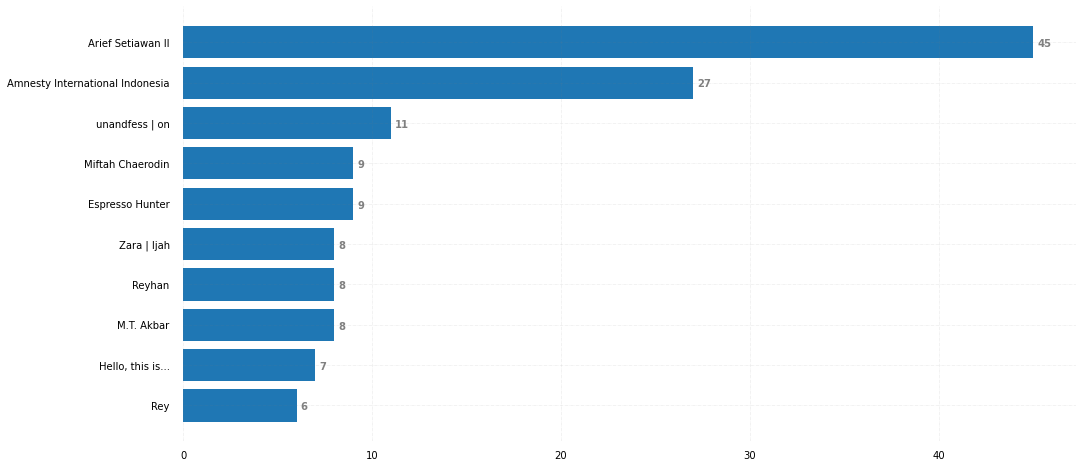

In [52]:
import pandas as pd 
from matplotlib import pyplot as plt 
  
name = top[0].head(10) 
price = top[1].head(10) 
  
# Figure Size 
fig, ax = plt.subplots(figsize =(16, 8)) 
  
# Horizontal Bar Plot 
ax.barh(name, price) 
  
# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
  
#Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
  
# Show top values  
ax.invert_yaxis() 
  
# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='grey') 
  
# Add Plot Title 
#ax.set_title('Sports car and their price in crore', 
            # loc ='left', ) 
  
# Add Text watermark 
fig.text(0.9, 0.15,'',fontsize = 12, 
         color ='grey', ha ='right', va ='bottom', 
         alpha = 0.7) 
  
# Show Plot 
plt.show() 